<a href="https://colab.research.google.com/github/harshitha521/Traffic-Light-Detection-YOLOv8-for-autonomous-vehicles/blob/main/harshitha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python --upgrade

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


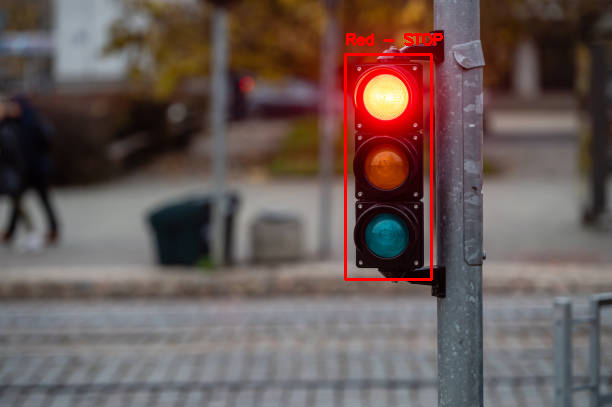

In [ ]:
import cv2
import numpy as np
import requests
import os
from google.colab.patches import cv2_imshow

# URLs for YOLOv4 configuration and weights files
config_url = "https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4.cfg"
weights_url = "https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights"

# Directory to store the downloaded files
download_dir = "models"
os.makedirs(download_dir, exist_ok=True)

# Download the configuration file
config_path = os.path.join(download_dir, "yolov4.cfg")
with open(config_path, "wb") as f:
    f.write(requests.get(config_url).content)

# Download the weights file
weights_path = os.path.join(download_dir, "yolov4.weights")
with open(weights_path, "wb") as f:
    f.write(requests.get(weights_url).content)

# Load pre-trained YOLO model
net = cv2.dnn_DetectionModel(weights_path, config_path)
net.setInputSize(416, 416)
net.setInputScale(1/255.0)
net.setInputSwapRB(True)

# Load image
img = cv2.imread("/content/drive/MyDrive/ML LAB/MINOR PROJECTSS/istockphoto-1450110257-612x612.jpg")  # Ensure the path is correct!

# Check if image loaded successfully
if img is None:
    print("Error: Could not load image. Please check the image path.")
    exit()

# Perform object detection
class_ids, confidences, bbox = net.detect(img, confThreshold=0.5, nmsThreshold=0.4)

# COCO class names (Ensure all classes are correctly listed)
coco_classes = ["person", "bicycle", "car", "motorcycle", "airplane", "bus", "train",
                "truck", "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", ...]

# Function to detect the dominant color in the bounding box
def detect_traffic_light_color(roi):
    hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

    # Define color ranges in HSV
    red_lower1 = np.array([0, 100, 100])
    red_upper1 = np.array([10, 255, 255])
    red_lower2 = np.array([160, 100, 100])
    red_upper2 = np.array([180, 255, 255])

    green_lower = np.array([35, 100, 100])
    green_upper = np.array([85, 255, 255])

    # Create masks for red and green
    red_mask1 = cv2.inRange(hsv, red_lower1, red_upper1)
    red_mask2 = cv2.inRange(hsv, red_lower2, red_upper2)
    red_mask = red_mask1 + red_mask2

    green_mask = cv2.inRange(hsv, green_lower, green_upper)

    # Count nonzero pixels in masks
    red_count = cv2.countNonZero(red_mask)
    green_count = cv2.countNonZero(green_mask)

    # Decision based on pixel count
    if red_count > green_count:
        return "Red - STOP"
    elif green_count > red_count:
        return "Green - GO"
    else:
        return "Yellow/Unknown - WAIT"

# Loop through detected objects
for class_id, confidence, box in zip(class_ids.flatten(), confidences.flatten(), bbox):
    if class_id == 9:  # Traffic light class in COCO dataset
        x, y, w, h = box  # No need to scale
        roi = img[y:y+h, x:x+w]  # Extract the detected traffic light region

        if roi.size == 0:
            continue  # Skip if ROI is empty

        status = detect_traffic_light_color(roi)

        # Draw bounding box
        color = (0, 255, 0) if "GO" in status else (0, 0, 255)  # Green for GO, Red for STOP
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, status, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Show the result
cv2_imshow(img)

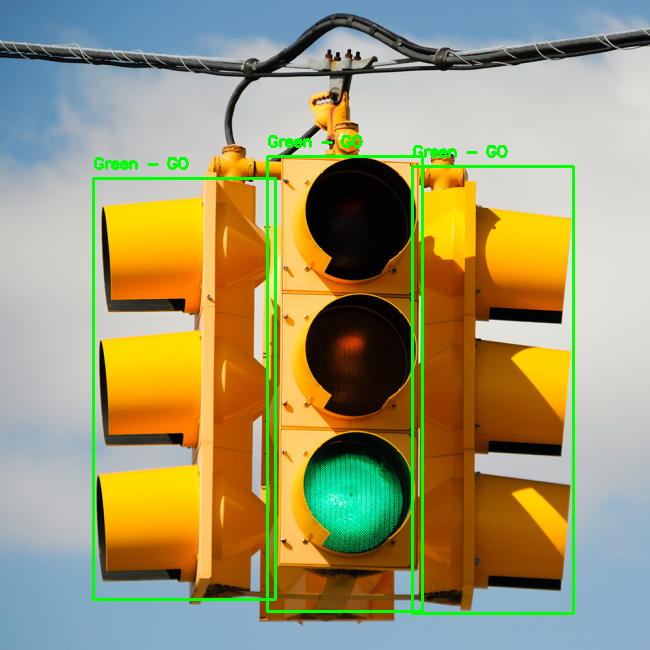

In [ ]:
import cv2
import numpy as np
import requests
import os
from google.colab.patches import cv2_imshow

# URLs for YOLOv8 configuration and weights files
config_url = "https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4.cfg"
weights_url = "https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights"

# Directory to store the downloaded files
download_dir = "models"
os.makedirs(download_dir, exist_ok=True)

# Download the configuration file
config_path = os.path.join(download_dir, "yolov4.cfg")
with open(config_path, "wb") as f:
    f.write(requests.get(config_url).content)

# Download the weights file
weights_path = os.path.join(download_dir, "yolov4.weights")
with open(weights_path, "wb") as f:
    f.write(requests.get(weights_url).content)

# Load pre-trained YOLO model
net = cv2.dnn_DetectionModel(weights_path, config_path)
net.setInputSize(416, 416)
net.setInputScale(1/255.0)
net.setInputSwapRB(True)

# Load image
img = cv2.imread("/content/drive/MyDrive/ML LAB/MINOR PROJECTSS/traffic light_0.jpg")  # Ensure the path is correct!

# Check if image loaded successfully
if img is None:
    print("Error: Could not load image. Please check the image path.")
    exit()

# Perform object detection
class_ids, confidences, bbox = net.detect(img, confThreshold=0.5, nmsThreshold=0.4)

# COCO class names (Ensure all classes are correctly listed)
coco_classes = ["person", "bicycle", "car", "motorcycle", "airplane", "bus", "train",
                "truck", "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", ...]

# Function to detect the dominant color in the bounding box
def detect_traffic_light_color(roi):
    hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

    # Define color ranges in HSV
    red_lower1 = np.array([0, 100, 100])
    red_upper1 = np.array([10, 255, 255])
    red_lower2 = np.array([160, 100, 100])
    red_upper2 = np.array([180, 255, 255])

    green_lower = np.array([35, 100, 100])
    green_upper = np.array([85, 255, 255])

    # Create masks for red and green
    red_mask1 = cv2.inRange(hsv, red_lower1, red_upper1)
    red_mask2 = cv2.inRange(hsv, red_lower2, red_upper2)
    red_mask = red_mask1 + red_mask2

    green_mask = cv2.inRange(hsv, green_lower, green_upper)

    # Count nonzero pixels in masks
    red_count = cv2.countNonZero(red_mask)
    green_count = cv2.countNonZero(green_mask)

    # Decision based on pixel count
    if red_count > green_count:
        return "Red - STOP"
    elif green_count > red_count:
        return "Green - GO"
    else:
        return "Yellow/Unknown - WAIT"

# Loop through detected objects
for class_id, confidence, box in zip(class_ids.flatten(), confidences.flatten(), bbox):
    if class_id == 9:  # Traffic light class in COCO dataset
        x, y, w, h = box  # No need to scale
        roi = img[y:y+h, x:x+w]  # Extract the detected traffic light region

        if roi.size == 0:
            continue  # Skip if ROI is empty

        status = detect_traffic_light_color(roi)

        # Draw bounding box
        color = (0, 255, 0) if "GO" in status else (0, 0, 255)  # Green for GO, Red for STOP
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, status, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Show the result
cv2_imshow(img)

In [ ]:
import cv2
import numpy as np
import requests
import os
from google.colab.patches import cv2_imshow

# URLs for YOLOv8 configuration and weights files
config_url = "https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4.cfg"
weights_url = "https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights"

# Directory to store the downloaded files
download_dir = "models"
os.makedirs(download_dir, exist_ok=True)

# Download the configuration file
config_path = os.path.join(download_dir, "yolov4.cfg")
with open(config_path, "wb") as f:
    f.write(requests.get(config_url).content)

# Download the weights file
weights_path = os.path.join(download_dir, "yolov4.weights")
with open(weights_path, "wb") as f:
    f.write(requests.get(weights_url).content)

# Load pre-trained YOLO model
net = cv2.dnn_DetectionModel(weights_path, config_path)
net.setInputSize(416, 416)
net.setInputScale(1/255.0)
net.setInputSwapRB(True)

# Load image
img = cv2.imread("/content/drive/MyDrive/ML LAB/MINOR PROJECTSS/th (1).jpg")  # Ensure the path is correct!

# Check if image loaded successfully
if img is None:
    print("Error: Could not load image. Please check the image path.")
    exit()

# Perform object detection
class_ids, confidences, bbox = net.detect(img, confThreshold=0.5, nmsThreshold=0.4)

# COCO class names (Ensure all classes are correctly listed)
coco_classes = ["person", "bicycle", "car", "motorcycle", "airplane", "bus", "train",
                "truck", "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", ...]

# Function to detect the dominant color in the bounding box
def detect_traffic_light_color(roi):
    hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

    # Define color ranges in HSV
    red_lower1 = np.array([0, 100, 100])
    red_upper1 = np.array([10, 255, 255])
    red_lower2 = np.array([160, 100, 100])
    red_upper2 = np.array([180, 255, 255])

    green_lower = np.array([35, 100, 100])
    green_upper = np.array([85, 255, 255])

    # Create masks for red and green
    red_mask1 = cv2.inRange(hsv, red_lower1, red_upper1)
    red_mask2 = cv2.inRange(hsv, red_lower2, red_upper2)
    red_mask = red_mask1 + red_mask2

    green_mask = cv2.inRange(hsv, green_lower, green_upper)

    # Count nonzero pixels in masks
    red_count = cv2.countNonZero(red_mask)
    green_count = cv2.countNonZero(green_mask)

    # Decision based on pixel count
    if red_count > green_count:
        return "Red - STOP"
    elif green_count > red_count:
        return "Green - GO"
    else:
        return "Yellow/Unknown - WAIT"

# Loop through detected objects
for class_id, confidence, box in zip(class_ids.flatten(), confidences.flatten(), bbox):
    if class_id == 9:  # Traffic light class in COCO dataset
        x, y, w, h = box  # No need to scale
        roi = img[y:y+h, x:x+w]  # Extract the detected traffic light region

        if roi.size == 0:
            continue  # Skip if ROI is empty

        status = detect_traffic_light_color(roi)

        # Draw bounding box
        color = (0, 255, 0) if "GO" in status else (0, 0, 255)  # Green for GO, Red for STOP
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, status, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Show the result
cv2_imshow(img)